In [2]:
# Импорт используемых модулей
from sympy import Matrix, symbols, init_printing, Eq, solve
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [280]:
# Акустическая модель
rho, c = symbols("rho c")
print("Let's deal with 1D problem.")
A = Matrix([[0, 1 / rho],[rho * c**2, 0]]) # Создаём матрицу для 1D акустической задачи
print("The matrix A = ")
display(A)
w = A.eigenvals() # Вычисляем её собственные значения
print(Matrix(list(w)))
display(A.eigenvects())

Let's deal with 1D problem.
The matrix A = 


⎡      1⎤
⎢ 0    ─⎥
⎢      ρ⎥
⎢       ⎥
⎢ 2     ⎥
⎣c ⋅ρ  0⎦

Matrix([[-c], [c]])


⎡⎛       ⎡⎡-1 ⎤⎤⎞  ⎛      ⎡⎡ 1 ⎤⎤⎞⎤
⎢⎜       ⎢⎢───⎥⎥⎟  ⎜      ⎢⎢───⎥⎥⎟⎥
⎢⎜-c, 1, ⎢⎢c⋅ρ⎥⎥⎟, ⎜c, 1, ⎢⎢c⋅ρ⎥⎥⎟⎥
⎢⎜       ⎢⎢   ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

In [271]:
Omega = Matrix([[1, 1], [-1, 1]])
display(Omega)

⎡1   1⎤
⎢     ⎥
⎣-1  1⎦

In [276]:
# С-х метод на примере 1D уравнения переноса
L = 2.0 # x = [-1,1]
C = 1.0 # lyambda
T = 1.0 * L / abs(C) # 1 полный оборот начального возмущения
M = 210 # количество узлов вдоль оси
h = L / M # шаг по координате, h
dt = 0.4 * h / abs(C) # коэффициент должен быть меньше единицы
v_curr = np.zeros(M)
v_next = np.zeros(M)
p_curr, p_next = np.zeros(M), np.zeros(M)
for i in range(int(1.0 / 3.0 * M), int(2.0 / 3.0 * M)):
    v_curr[i] = 1.0 # начальное ненулевое значение в средней трети области
    p_curr[i] = 2.0
    
for i in range(M):
    para = Omega * Matrix([v_curr[i], p_curr[i]])
    v_curr[i] = para[0]
    p_curr[i] = para[1]

# Рисуем график до начала расчёта
x_m = np.linspace(-1.0, L, M)

# Начальные условия
v_0, p_0 = [], []
for i in range(len(v_curr)):
    v_0.append(v_curr[i])
    p_0.append(p_curr[i])

# Скорость
for j in range(int(T / dt)):
    for i in range(M):
        if i == 0: # периодические граничные условия
            a = (v_curr[i + 1] + v_curr[M - 1] - 2 * v_curr[i]) / (2 * h ** 2)
            b = (v_curr[i + 1] - v_curr[M - 1]) / (2 * h)
        elif i == M - 1:
            a = (v_curr[0] + v_curr[i - 1] - 2 * v_curr[i]) / (2 * h ** 2)
            b = (v_curr[0] - v_curr[i - 1]) / (2 * h)
        else:
            a = (v_curr[i + 1] + v_curr[i - 1] - 2 * v_curr[i]) / (2 * h ** 2)
            b = (v_curr[i + 1] - v_curr[i - 1]) / (2 * h)
        c = v_curr[i]
        k = C * dt
        temp = a * k ** 2 + b * k + c
        if i != 0 and i != M - 1:
            min_, max_ = min(v_curr[i - 1], v_curr[i + 1]), max(v_curr[i - 1], v_curr[i + 1])
            if temp > max_:
                v_next[i] = max_
            elif temp < min_:
                v_next[i] = min_
            else:
                v_next[i] = temp
        else:
            v_next[i] = temp
    for i in range(M):
        v_curr[i] = v_next[i]

# Давление
for j in range(int(T / dt)):
    for i in range(M):
        if i == 0: # периодические граничные условия
            a = (p_curr[i + 1] + p_curr[M - 1] - 2 * p_curr[i]) / (2 * h ** 2)
            b = (p_curr[i + 1] - p_curr[M - 1]) / (2 * h)
        elif i == M - 1:
            a = (p_curr[0] + p_curr[i - 1] - 2 * p_curr[i]) / (2 * h ** 2)
            b = (p_curr[0] - p_curr[i - 1]) / (2 * h)
        else:
            a = (p_curr[i + 1] + p_curr[i - 1] - 2 * p_curr[i]) / (2 * h ** 2)
            b = (p_curr[i + 1] - p_curr[i - 1]) / (2 * h)
        c = p_curr[i]
        k = C * dt
        temp = a * k ** 2 + b * k + c
        if i != 0 and i != M - 1:
            min_, max_ = min(p_curr[i - 1], p_curr[i + 1]), max(p_curr[i - 1], p_curr[i + 1])
            if temp > max_:
                p_next[i] = max_
            elif temp < min_:
                p_next[i] = min_
            else:
                p_next[i] = temp
        else:
            p_next[i] = temp
    for i in range(M):
        p_curr[i] = p_next[i]

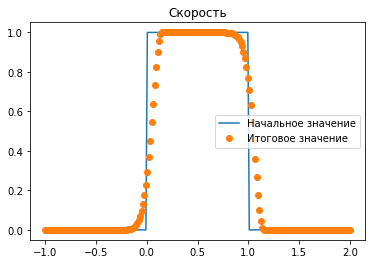

In [277]:
for i in range(M):
    para = Omega ** (-1) * Matrix([v_curr[i], p_curr[i]])
    v_curr[i] = abs(para[0])
    p_curr[i] = abs(para[1])
for i in range(M):
    para = Omega ** (-1) * Matrix([v_0[i], p_0[i]])
    v_0[i] = abs(para[0])
    p_0[i] = abs(para[1])
plt.plot(x_m, v_0, label = "Начальное значение")
plt.plot(x_m, v_curr, 'o', label = "Итоговое значение")
plt.legend()
plt.title('Скорость')
plt.show()

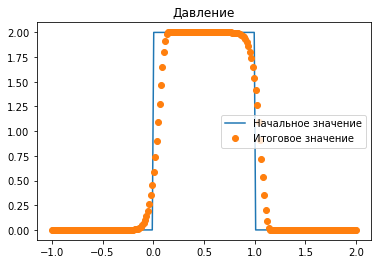

In [279]:
plt.plot(x_m, p_0, label = "Начальное значение")
plt.plot(x_m, p_curr, 'o', label = "Итоговое значение")
plt.legend()
plt.title('Давление')
plt.show()